# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [80]:
print("There were a total of 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.")

There were a total of 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time
import numpy as np


In [82]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [84]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [85]:
(df.isnull().sum() / len(df)) * 100


age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

The dataset contains no missing values, but the data description informs us that there are "unknown" values in the data set. Given that they will not help classify and transform the data as necessary, we can check for any unknown values and remove them. 

In [86]:
df_clean = df[~df.isin(['unknown']).any(axis=1)]
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null  floa

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [87]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null  floa

In [88]:
print("The goal is to predict whether a client will subscribe to a term deposit (yes / no)")

The goal is to predict whether a client will subscribe to a term deposit (yes / no)


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [89]:
df_encoded = df_clean[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]
df_encoded

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
6,59,admin.,married,professional.course,no,no,no,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


In [90]:
X = df_encoded.drop('y', axis = 1)
y = df_encoded['y']

We must first encode and transform the data as necessary. To do this we must first break up the data into numerical and categorical columns. Given that the 'y' column contains only yes/no values, we can use a simple Label Encoder for the output. We will use One Hot Encoding for the more complicated input features, along with a standard scaler to scale the values. 

In [91]:
le = LabelEncoder()
y = le.fit_transform(y)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [92]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [94]:
#majority_class = y_train.value_counts().idxmax()
values, counts = np.unique(y_train, return_counts = True)
majority_class = values[counts == counts.max()]
baseline_accuracy = (y_test == majority_class).mean()

print(f"Baseline accuracy (predicting majority class '{majority_class}'): {baseline_accuracy:.4f}")

Baseline accuracy (predicting majority class '[0]'): 0.8698


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [95]:
results = []
log_pipeline = Pipeline([('preprocessor', preprocessor),
                     ('logisticregression', LogisticRegression())])
log_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan'])])),
                ('logisticregression', LogisticRegression())])

### Problem 9: Score the Model

What is the accuracy of your model?

In [96]:
train_accuracy = log_pipeline.score(X_train, y_train)
test_accuracy = log_pipeline.score(X_test, y_test)
# logistic_accuracy = accuracy_score(y_test, log_pipeline.predict(X_test))
print("Logistic Regression Training Accuracy: ", train_accuracy)
print("Logistic Regression Test Accuracy: ", test_accuracy)



Logistic Regression Training Accuracy:  0.8743337433374334
Logistic Regression Test Accuracy:  0.8697933748770088


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [97]:

selected_models = { 'logisticregression' : LogisticRegression(),
    'knn' : KNeighborsClassifier(),
    'svc' : SVC(),
    'dt' : DecisionTreeClassifier()}


Running a basic pipeline for all of the models above, We can see that all of the training scores have beat the baseline prediction of 0.869. The test scores of the logistic regression and SVN models are identical to the baseline prediction, with the KNN and decision Tree Classifier models having a lower test accuracy. We can try to improve this further with feature importance and hyperparameter tuning. 

In terms of fit time, the KNN model fit the training data the fastest, while SVN took the longest amount of time. The recommended model for these initial findings is logistic regression, due to the low training time, and highest test score. 

In [98]:
results = []
for name, model in selected_models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    
    # Fit the model and time it
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    fit_time = (time.time() - start_time)
    
    
    # Evaluate on training and test sets
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    
    # Append the results
    results.append([name, fit_time, train_score, test_score])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Score', 'Test Score'])
results_df.set_index('Model', inplace=True)


In [99]:
results_df

,Train Time,Train Score,Test Score
Model,,,
logisticregression,0.055280,0.874334,0.869793
knn,0.028072,0.875687,0.860118
svc,13.910017,0.874334,0.869793
dt,0.231613,0.901681,0.853067


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [100]:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7, 9, 11]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [None, 5, 10, 15]})
}

results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=4)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    print("Name: ", name, "\t" "Best params:", grid_search.best_params_)
    # Append the results
    results.append([name, fit_time, train_score, test_score])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Score', 'Test Score'])
results_df.set_index('Model', inplace=True)
results_df

Name:  knn 	Best params: {'knn__n_neighbors': 11}
Name:  logisticregression 	Best params: {'logisticregression__C': 0.1}
Name:  svc 	Best params: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Name:  decisiontreeclassifier 	Best params: {'decisiontreeclassifier__max_depth': 5}


,Train Time,Train Score,Test Score
Model,,,
knn,5.313350,0.875400,0.869137
logisticregression,0.154558,0.874334,0.869793
svc,63.865405,0.874334,0.869793
decisiontreeclassifier,0.219828,0.874826,0.868645


Using Grid Search to optimize hyperparameters, we have found that all models perform relatively similarly with training and test score accuracy. The test accuracy of all of the models is slightly lower than the baseline prediction at 0.869, while the training accuracy is slightly higher at greater than 0.87. Logistic Regression and SVC still appear to have identical training and test scores. 

KNN appears to have the highest training accuracy, while both logistic regression and SVC models have the higher test accuracies. 

Since we have only explored bank parameters so far, we can explore the most important features in this dataset for predictions, and to improve our accuracy further. We can use the feature importance method within a decision tree classifier to come up with the five most important features in this dataset. 

C:\Users\achan\AppData\Local\Temp\ipykernel_78696\1145369344.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


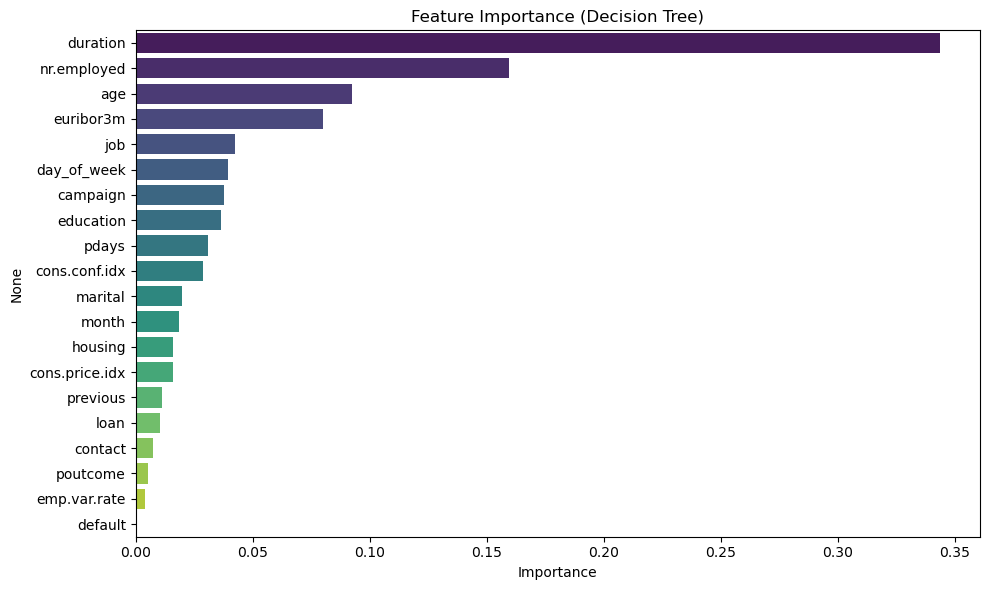

In [101]:
df_encoded_all = df_clean.copy()
label_encoders = {}
for col in df_encoded_all.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded_all[col] = le.fit_transform(df_encoded_all[col])
    label_encoders[col] = le

X = df_encoded_all.drop('y', axis=1)
y = df_encoded_all['y']

le = LabelEncoder()
y = le.fit_transform(y)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)

importances = tree_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

We have identified that duration, nr. employed, age, euribor3m, and job are the five most influential features in this dataset. The next step is to isolate these features, and re-run the grid search algorithm with the above models to determine our new model accuracies.  

In [102]:

X = df_clean[['duration', 'nr.employed', 'age', 'euribor3m', 'job']]

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=4)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    
    print("Name: ", name, "\t" "Best params:", grid_search.best_params_)


    # Append the results
    results.append([name, fit_time, train_score, test_score])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Score', 'Test Score'])
results_df.set_index('Model', inplace=True)
results_df

Name:  knn 	Best params: {'knn__n_neighbors': 11}
Name:  logisticregression 	Best params: {'logisticregression__C': 10}
Name:  svc 	Best params: {'svc__C': 1, 'svc__kernel': 'rbf'}
Name:  decisiontreeclassifier 	Best params: {'decisiontreeclassifier__max_depth': 5}


,Train Time,Train Score,Test Score
Model,,,
knn,0.297011,0.905112,0.893080
logisticregression,0.090712,0.892929,0.893189
svc,5.571949,0.898646,0.895594
decisiontreeclassifier,0.077920,0.903941,0.899421


### Summary and Conclusion

We can see that all of our models beat the baseline prediction of 0.869 by a minimum of 0.023 for the test scores. KNN once again appears to have the highest train score, with decision tree classifier containing the highest test accuracy. Interestingly, the training time for SVC is also significantly higher with the most important features, compared to only the bank feature parameters. 

Finding and selecting important features enabled us to beat the baseline accuracy and develop robust models. We recommend usiSng the decision tree classifier for the fastest training time, and the highest test score for this particular feature set. 